In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib import rc
import seaborn as sns

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams['font.size'] = 10
sns.set_theme()
sns.set_style("whitegrid")
colorblind_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
path = 'C:/Users/micha/Documents/Studium/BA_Oldenburg/Semester_Letztes/BA/ba_krah_michael'
exp1_trafo_results = pd.read_csv(path + '/results/EXP1_trafo_results.csv')
exp2_trafo_results = pd.read_csv(path + '/results/EXP2_trafo_results.csv')
bl_trafo_results = pd.read_csv(path + '/results/BL_trafo_results.csv')

In [4]:
bl_trafo_results.rename(columns={'post-dimming_perc': 'BL_dimming'}, inplace=True)
bl_trafo_results['EXP1_dimming'] = exp1_trafo_results['post-dimming_perc']
bl_trafo_results['EXP2_dimming'] = exp2_trafo_results['post-dimming_perc']
display(bl_trafo_results.head())

,Unnamed: 0,time,pre-dimming_perc,BL_dimming,EXP1_dimming,EXP2_dimming
0,0,54,102.357217,79.870974,86.499861,86.499861
1,1,56,99.360895,76.411089,86.727213,86.727148
2,2,58,97.638795,83.619232,86.177262,86.407632
3,3,60,91.160173,85.338917,86.193106,86.363034
4,4,70,86.967447,84.333517,83.752309,84.078679


# Descriptive analysis

Descriptive analysis

In [5]:
def compute_descriptive_statistics(df, column_name):
    stats = {
        'mean': df[column_name].mean(),
        'std': df[column_name].std(),
        '25%': df[column_name].quantile(0.25),
        '50% (median)': df[column_name].quantile(0.50),
        '75%': df[column_name].quantile(0.75),
        'min': df[column_name].min(),
        'max': df[column_name].max()
    }
    return stats

In [6]:
pre_dimming_stats = compute_descriptive_statistics(bl_trafo_results, 'pre-dimming_perc')
bl_dimming_stats = compute_descriptive_statistics(bl_trafo_results, 'BL_dimming')
exp1_dimming_stats = compute_descriptive_statistics(bl_trafo_results, 'EXP1_dimming')
exp2_dimming_stats = compute_descriptive_statistics(bl_trafo_results, 'EXP2_dimming')
print(f'Pre-dimming: {pre_dimming_stats}')
print(f'BL dimming: {bl_dimming_stats}')
print(f'Exp1 dimming: {exp1_dimming_stats}')
print(f'Exp2 dimming: {exp2_dimming_stats}')

Pre-dimming: {'mean': 109.57339534936995, 'std': 19.36434814970798, '25%': 94.39580154686114, '50% (median)': 105.29360313415212, '75%': 119.87148551256064, 'min': 85.00576721371169, 'max': 222.64707324819315}
BL dimming: {'mean': 71.44421085299543, 'std': 10.960570713234349, '25%': 64.91801307165176, '50% (median)': 72.7987536438671, '75%': 79.53939201010076, 'min': 14.955703810382598, 'max': 96.71461360165306}
Exp1 dimming: {'mean': 86.1399349982062, 'std': 4.056899478350618, '25%': 86.3123777322503, '50% (median)': 86.70700949769476, '75%': 86.95482488878604, 'min': 23.49248559249721, 'max': 87.78052093428406}
Exp2 dimming: {'mean': 86.20509048518134, 'std': 4.0531718890485395, '25%': 86.37494577119688, '50% (median)': 86.74684783759047, '75%': 86.97670945417393, 'min': 23.49248559249721, 'max': 87.80064760419528}


In [7]:
dimming_stats = pd.DataFrame([pre_dimming_stats, bl_dimming_stats, exp1_dimming_stats, exp2_dimming_stats]).T
dimming_stats.rename(columns={0: 'Pre-dimming', 1: 'Baseline', 2: 'EXP1', 3: 'EXP2'}, inplace=True)
dimming_stats.round(3)
#display(dimming_stats)
dimming_stats.to_latex(path + '/analysis/tables/trafo_results.tex')

Percentage point reduction in load

In [7]:
bl_trafo_results['BL_reduction'] = bl_trafo_results['pre-dimming_perc'] - bl_trafo_results['BL_dimming']
bl_reduction = compute_descriptive_statistics(bl_trafo_results, 'BL_reduction')
print(f'BL reduction: {bl_reduction}')
bl_trafo_results['EXP1_reduction'] = bl_trafo_results['pre-dimming_perc'] - bl_trafo_results['EXP1_dimming']
exp1_reduction = compute_descriptive_statistics(bl_trafo_results, 'EXP1_reduction')
print(f'EXP1 reduction: {exp1_reduction}')
bl_trafo_results['EXP2_reduction'] = bl_trafo_results['pre-dimming_perc'] - bl_trafo_results['EXP2_dimming']
exp2_reduction = compute_descriptive_statistics(bl_trafo_results, 'EXP2_reduction')
print(f'EXP2 reduction: {exp2_reduction}')

BL reduction: {'mean': 38.12918449637451, 'std': 23.582948969376826, '25%': 23.259105969633694, '50% (median)': 33.66218571119657, '75%': 45.91378808725243, 'min': -5.557649552898269, 'max': 165.10742594418252}
EXP1 reduction: {'mean': 23.433460351163742, 'std': 19.139077993137796, '25%': 8.506930832875867, '50% (median)': 19.109169279450725, '75%': 33.44770804150399, 'min': -1.6340096853535755, 'max': 136.33293807693997}
EXP2 reduction: {'mean': 23.368304864188588, 'std': 19.17891221510814, '25%': 8.366238738840806, '50% (median)': 19.02453810410435, '75%': 33.44328214878388, 'min': -1.7360413801173422, 'max': 136.29264892418064}


Plot with smoothing

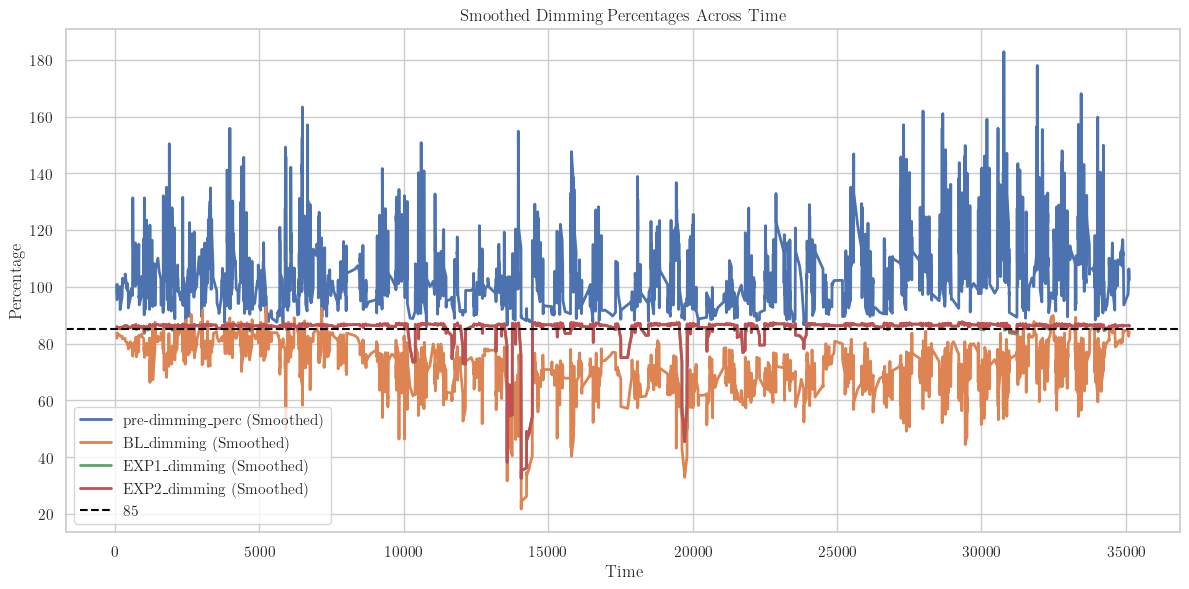

In [21]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 10})
rc('text', usetex=True)
# Parameters for smoothing
rolling_window = 5  # Size of the rolling window for the moving average

# Apply rolling average for smoothing
smoothed_data = bl_trafo_results.set_index('time').rolling(window=rolling_window).mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

columns_to_plot = ['pre-dimming_perc', 'BL_dimming', 'EXP1_dimming', 'EXP2_dimming']

for column in columns_to_plot:
    if column in smoothed_data.columns:  # Ensure the column exists in the dataframe
        ax.plot(smoothed_data.index, smoothed_data[column], label=f'{column} (Smoothed)', linewidth=2)

ax.axhline(y=85, color='black', linestyle='--', linewidth=1.5, label='85% Threshold')
# Add labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Percentage')
ax.set_title('Smoothed Dimming Percentages Across Time')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
smallest_values = bl_trafo_results.nsmallest(10, 'EXP1_dimming')[['time', 'BL_dimming']]
print(smallest_values)

       time  BL_dimming
2928  19632   18.265989
2930  19723   14.955704
2927  19631   20.285386
2223  14064   18.990837
2217  14058   23.913034
2135  13677   20.367666
2225  14066   21.110082
2221  14062   21.047136
2136  13678   20.496215
2219  14060   22.801551


Adding time columns

In [25]:
time_points_per_day = 96
time_points_per_hour = 4
bl_trafo_results['day'] = (bl_trafo_results['time'] // time_points_per_day) + 1

# 6 AM to 6 PM as daytime
time_of_day = bl_trafo_results['time'] % time_points_per_day
bl_trafo_results['day_or_night'] = ['day' if 24 <= t < 72 else 'night' for t in time_of_day]

bl_trafo_results['hour'] = time_of_day // time_points_per_hour

In [26]:
display(bl_trafo_results.head(20))

,Unnamed: 0,time,pre-dimming_perc,BL_dimming,EXP1_dimming,EXP2_dimming,day,day_or_night,hour
0,0,54,102.357217,79.870974,86.499861,86.499861,1,day,13
1,1,56,99.360895,76.411089,86.727213,86.727148,1,day,14
2,2,58,97.638795,83.619232,86.177262,86.407632,1,day,14
3,3,60,91.160173,85.338917,86.193106,86.363034,1,day,15
4,4,70,86.967447,84.333517,83.752309,84.078679,1,day,17
5,5,72,129.533074,81.851219,86.528709,86.526977,1,night,18
6,6,73,86.361179,83.575991,85.691531,85.922958,1,night,18
7,7,87,86.448000,83.821149,84.817664,84.829697,1,night,21
8,8,152,97.619533,81.051335,86.193196,86.200058,2,day,14
9,9,176,100.591393,83.035000,84.924125,85.374753,2,night,20


In [27]:
days_in_month = {
    1: 31,  # January
    2: 29,  # February -> 2016 Schaltjahr
    3: 31,  # March
    4: 30,  # April
    5: 31,  # May
    6: 30,  # June
    7: 31,  # July
    8: 31,  # August
    9: 30,  # September
    10: 31, # October
    11: 30, # November
    12: 31  # December
}

# Create a cumulative day count for each month
cumulative_days = [0]
for days in days_in_month.values():
    cumulative_days.append(cumulative_days[-1] + days)

# Assign months based on the cumulative day count
def get_month(day):
    for month, start_day in enumerate(cumulative_days[:-1], start=1):
        if start_day < day <= cumulative_days[month]:
            return month
    return None

bl_trafo_results['month'] = bl_trafo_results['day'].apply(get_month).astype(int)

In [28]:
display(bl_trafo_results)

,Unnamed: 0,time,pre-dimming_perc,BL_dimming,EXP1_dimming,EXP2_dimming,day,day_or_night,hour,month
0,0,54,102.357217,79.870974,86.499861,86.499861,1,day,13,1
1,1,56,99.360895,76.411089,86.727213,86.727148,1,day,14,1
2,2,58,97.638795,83.619232,86.177262,86.407632,1,day,14,1
3,3,60,91.160173,85.338917,86.193106,86.363034,1,day,15,1
4,4,70,86.967447,84.333517,83.752309,84.078679,1,day,17,1
...,...,...,...,...,...,...,...,...,...,...
5824,5824,35081,104.717872,85.060665,86.139784,86.139123,366,day,10,12
5825,5825,35103,139.850902,81.638928,86.599965,86.597753,366,day,15,12
5826,5826,35105,91.849220,81.292613,86.227494,86.234501,366,day,16,12
5827,5827,35109,89.841583,87.621431,86.790526,86.794309,366,day,17,12


In [29]:
bl_trafo_results.columns

Index(['Unnamed: 0', 'time', 'pre-dimming_perc', 'BL_dimming', 'EXP1_dimming',
       'EXP2_dimming', 'day', 'day_or_night', 'hour', 'month'],
      dtype='object')

Plot with day axis

In [30]:
# average number of congestions per day for moving average
avg_no_congestions_per_day = len(bl_trafo_results) / 365
print(avg_no_congestions_per_day)

15.96986301369863


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


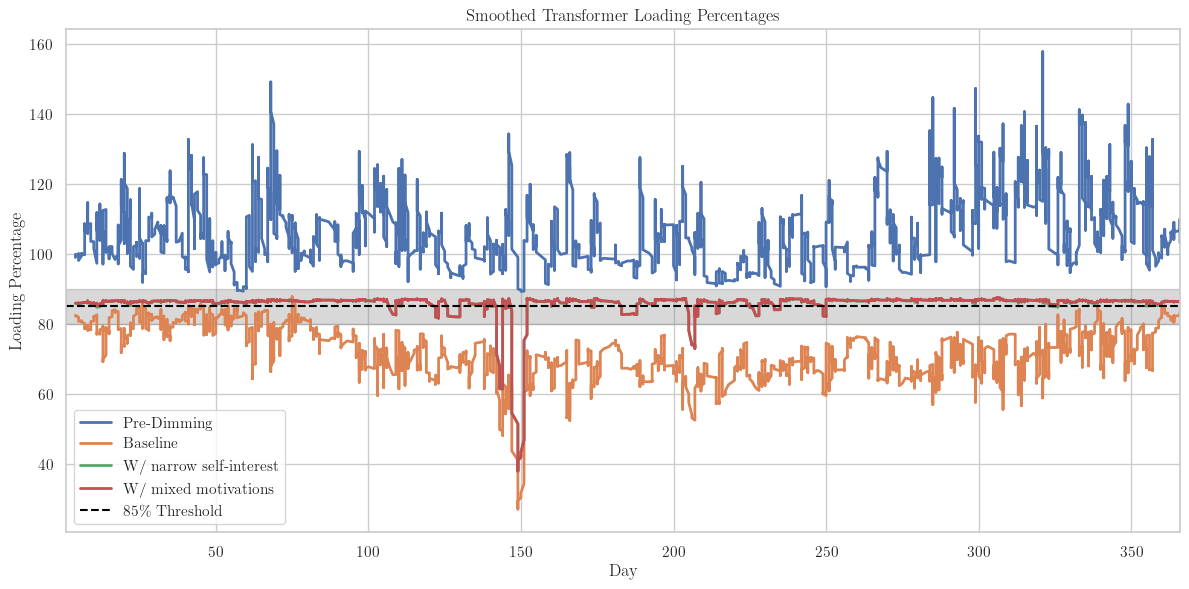

In [38]:
# Parameters for smoothing
rolling_window = 16  # Size of the rolling window for the moving average

# Apply rolling average for smoothing
numeric_columns = bl_trafo_results.select_dtypes(include='number')
smoothed_data = numeric_columns.set_index('day').rolling(window=rolling_window).mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

columns_to_plot = ['pre-dimming_perc', 'BL_dimming', 'EXP1_dimming', 'EXP2_dimming']
labels = ['Pre-Dimming', 'Baseline', 'W/ narrow self-interest', 'W/ mixed motivations']

for i, column in enumerate(columns_to_plot):
    if column in smoothed_data.columns:  # Ensure the column exists in the dataframe
        ax.plot(smoothed_data.index, smoothed_data[column], label=labels[i], linewidth=2)

ax.axhline(y=85, color='black', linestyle='--', linewidth=1.5, label='85\% Threshold')
ax.axhspan(80, 90, color='gray', alpha=0.3)
# Add labels, title, and legend
ax.set_xlabel('Day')
ax.set_xlim(1, 366)
ax.set_ylabel('Loading Percentage')
ax.set_title('Smoothed Transformer Loading Percentages')
ax.legend()

# Show the plot
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/trafo_results.eps', dpi = 300, format = 'eps')

In [20]:
bl_trafo_results['month'].value_counts()

month
11    743
12    612
10    608
4     523
3     509
2     442
1     437
8     436
7     403
9     394
5     370
6     352
Name: count, dtype: int64

C:\Users\micha\AppData\Local\Temp\ipykernel_14800\650548243.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_labels, rotation=45, ha='right')


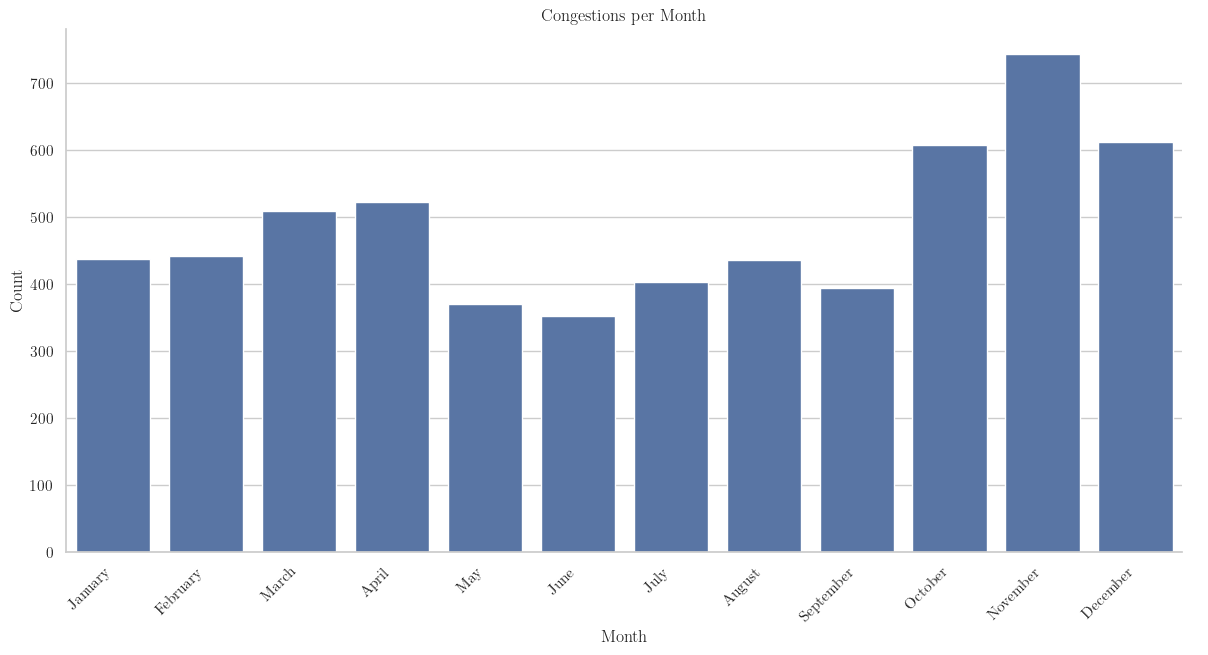

In [36]:
plot = sns.catplot(bl_trafo_results, x='month', kind='count', height=6, aspect=2)
ax = plot.ax
ax.grid(True, axis='y', which='both')
#ax.grid(True, axis='y', which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
ax.set_title('Congestions per Month')
ax.set_ylabel('Count')
ax.set_xlabel('Month')
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(month_labels, rotation=45, ha='right')
plt.savefig(path + '/analysis/figures/trafo_congestions_per_month.eps', dpi = 300, format = 'eps')

In [21]:
bl_trafo_results['day_or_night'].value_counts()

day_or_night
day      5693
night     136
Name: count, dtype: int64

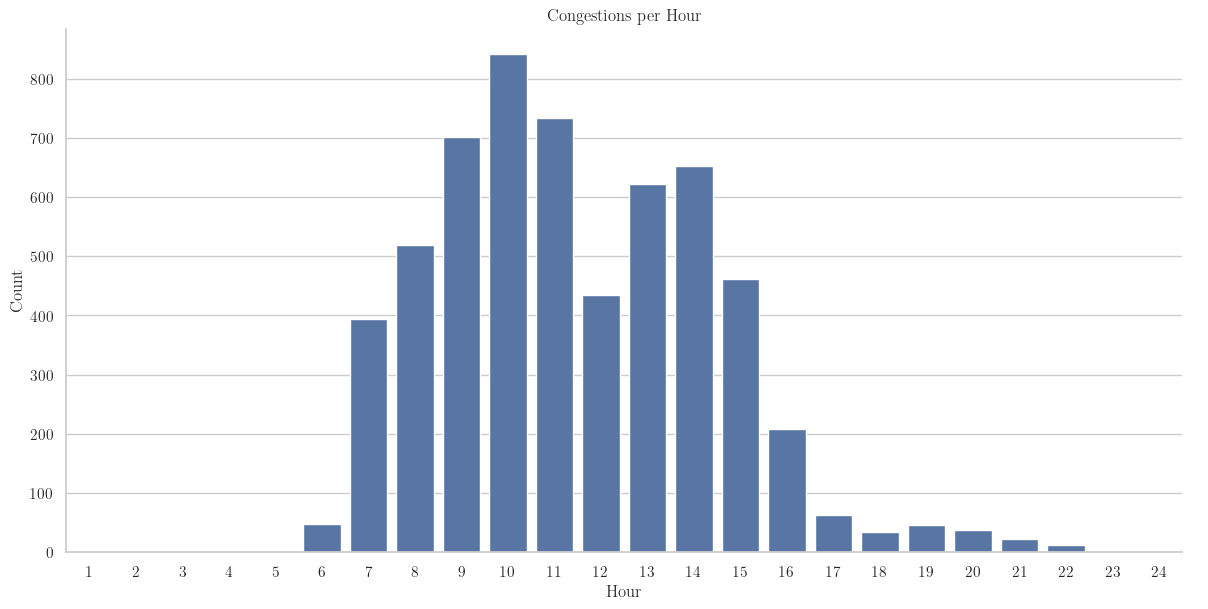

In [37]:
bl_trafo_results['hour'] = pd.Categorical(
    bl_trafo_results['hour'],
    categories=list(range(1, 25)),
    ordered=True
)
plot = sns.catplot(bl_trafo_results, x='hour', kind='count', height=6, aspect=2)
ax = plot.ax
ax.grid(True, axis='y', which='both')
#ax.grid(True, axis='y', which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
ax.set_title('Congestions per Hour')
ax.set_ylabel('Count')
ax.set_xlabel('Hour')
plt.savefig(path + '/analysis/figures/trafo_congestions_per_hour.eps', dpi = 300, format = 'eps')